<a href="https://colab.research.google.com/github/mazenbuk/intern/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.github.com/mazenbuk/intern/main/cancer%20patient%20data%20sets.csv')

In [ ]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data = data.drop(columns=['index', 'Patient Id'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
Xtrain = train.drop(columns=['Level'], axis=1)
ytrain = train['Level']

Xtest = test.drop(columns=['Level'], axis=1)
ytest = test['Level']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(ytrain)
y_test = encoder.transform(ytest)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)

In [10]:
!pip install lazypredict

In [11]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier( verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit( X_train, X_train, y_train, y_train )
models_test, predictions_test = clf.fit( X_train, X_test, y_train, y_test )

100%|██████████| 29/29 [00:01<00:00, 13.75it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] Start training from score -1.039165
[LightGBM] [Info] Start training from score -1.171183
[LightGBM] [Info] Start training from score -1.089900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

100%|██████████| 29/29 [00:01<00:00, 15.38it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 28/29 [00:02<00:00,  6.55it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] Start training from score -1.039165
[LightGBM] [Info] Start training from score -1.171183
[LightGBM] [Info] Start training from score -1.089900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

100%|██████████| 29/29 [00:02<00:00,  9.85it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [12]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.09
LabelPropagation,1.00,1.00,None,1.00,0.09
XGBClassifier,1.00,1.00,None,1.00,0.12
SVC,1.00,1.00,None,1.00,0.04
SGDClassifier,1.00,1.00,None,1.00,0.02
RandomForestClassifier,1.00,1.00,None,1.00,0.23
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.03
LogisticRegression,1.00,1.00,None,1.00,0.04
BaggingClassifier,1.00,1.00,None,1.00,0.05


In [13]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.05
LabelSpreading,1.00,1.00,None,1.00,0.08
XGBClassifier,1.00,1.00,None,1.00,1.12
SVC,1.00,1.00,None,1.00,0.03
SGDClassifier,1.00,1.00,None,1.00,0.02
RandomForestClassifier,1.00,1.00,None,1.00,0.36
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.01
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.02
LogisticRegression,1.00,1.00,None,1.00,0.04


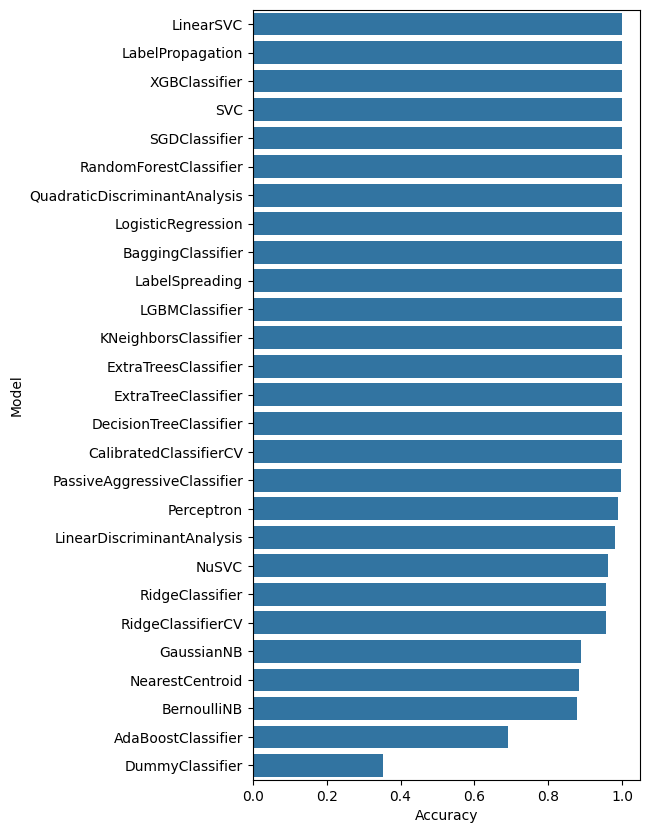

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 10))
ax = sns.barplot(y=models_train.index, x='Accuracy', data=models_train)